# 傅里叶变换

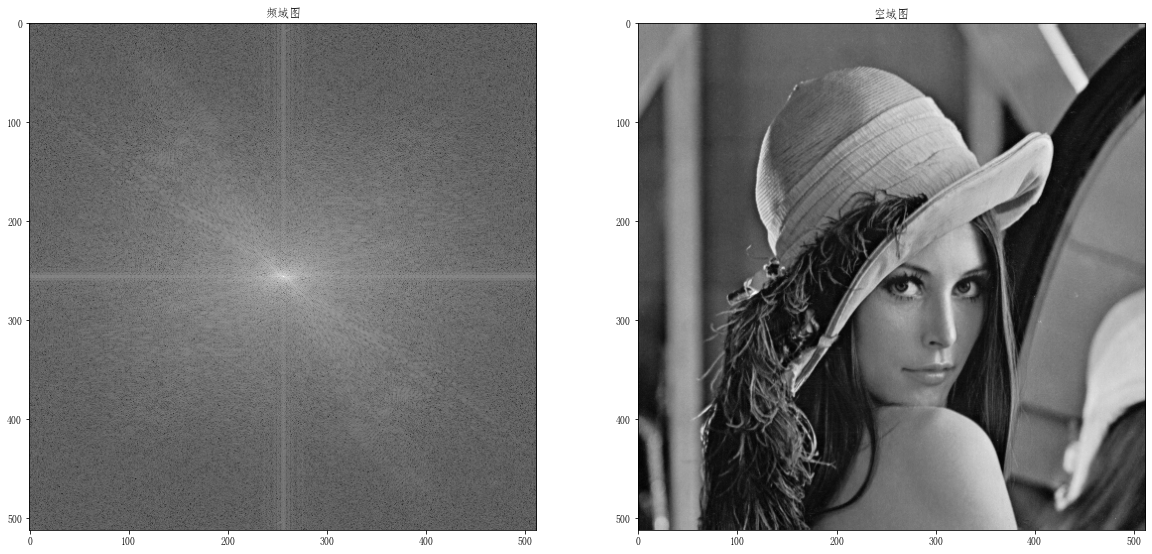

In [19]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

#matplotlib标题字体设置
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

#调整图像大小
plt.figure(figsize=(20, 20))

#读取图像
img = cv2.imread('img/FFT/lena.jpg', 0)  # 直接读为灰度图像
# numpy傅里叶变换
f = np.fft.fft2(img)
# 移位
f_shift = np.fft.fftshift(f)

# 取绝对值：将复数变化成实数
# 取对数的目的为了将数据变化到较小的范围（比方0-255）
s1 = np.log(np.abs(f))
s2 = np.log(np.abs(f_shift))

# 进行傅里叶逆变换 将频率谱转为图像
img_back = np.fft.ifft2(f)
img_back = np.abs(img_back)

# 移位到中点的频率图
plt.subplot(121), plt.imshow(s2, 'gray'), plt.title('频域图')
#展示图像
plt.subplot(122), plt.imshow(img_back, 'gray'), plt.title('空域图')
plt.show()

# 高通变换

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


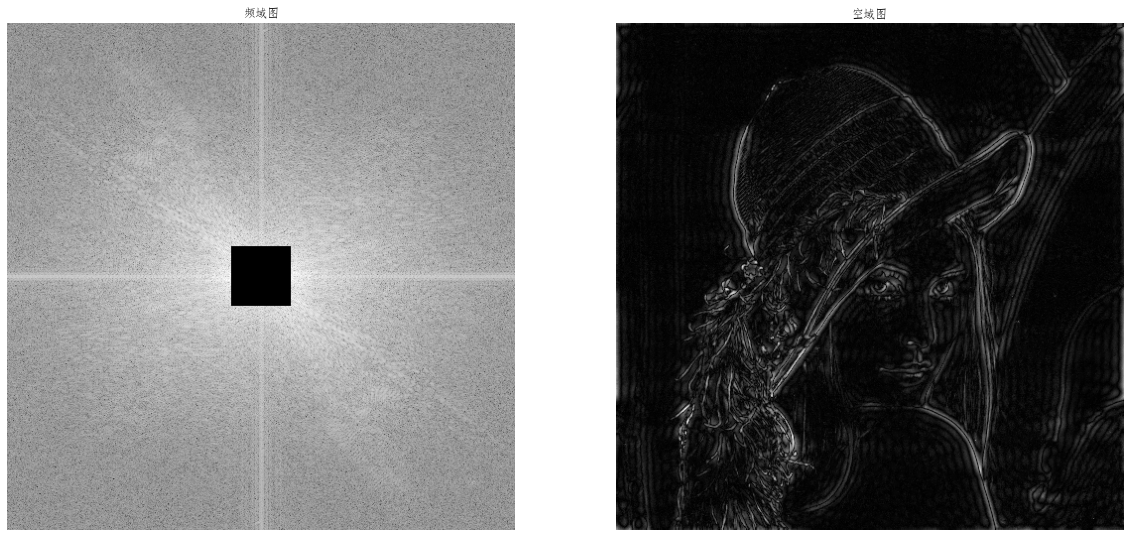

In [30]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20, 20))

#读取图像
img = cv.imread('img/FFT/lena.jpg', 0)

#傅里叶变换
img_f = np.fft.fft2(img)
img_f_shift = np.fft.fftshift(img_f) #用来复原图像
f_shift=img_f_shift                  #用来绘制图像频域图

#进行高通滤波器
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)
img_f_shift[crow-30:crow+30, ccol-30:ccol+30] = 0

#绘制频域图
f_shift=np.log(np.abs(f_shift))
f_shift[crow-30:crow+30, ccol-30:ccol+30] = 0
plt.subplot(121), plt.imshow(f_shift, 'gray'), plt.title('频域图')
plt.axis('off')

#绘制空域图
#傅里叶逆变换
ishift = np.fft.ifftshift(img_f_shift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)
plt.subplot(122), plt.imshow(iimg, 'gray'), plt.title('空域图')
plt.axis('off')
plt.show()

# 低通滤波器

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


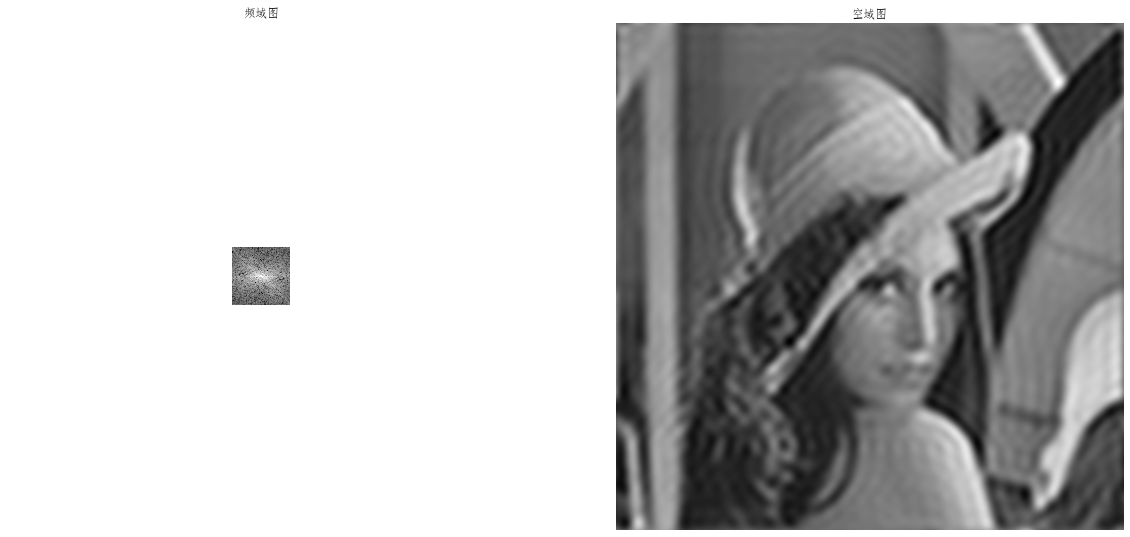

In [32]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20, 20))

#读取图像
img = cv.imread('img/FFT/lena.jpg', 0)

#傅里叶变换
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(dft)

#设置低通滤波器
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2) #中心位置
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

#掩膜图像和频谱图像乘积
f = fshift * mask

s_low=np.log(np.abs(f))
#傅里叶逆变换
ishift = np.fft.ifftshift(f)
iimg = cv2.idft(ishift)
res = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])
s_low=cv2.magnitude(s_low[:,:,0], s_low[:,:,1])

plt.subplot(121), plt.imshow(s_low, 'gray'), plt.title('频域图')
plt.axis('off')
plt.subplot(122), plt.imshow(res, 'gray'), plt.title('空域图')
plt.axis('off')
plt.show()